# Gradient Descent with a Single Feature

# Use the numerical gradient function from the mini-project to implement a simple linear regression with one feature

Iteration 0: Cost=4.9281, w=0.6580, b=0.0500
Iteration 50: Cost=1.3982, w=1.0992, b=0.4586
Iteration 100: Cost=1.2895, w=1.0371, b=0.6831
Iteration 150: Cost=1.2121, w=0.9846, b=0.8727
Iteration 200: Cost=1.1569, w=0.9402, b=1.0327
Iteration 250: Cost=1.1176, w=0.9028, b=1.1678
Iteration 300: Cost=1.0895, w=0.8712, b=1.2819
Iteration 350: Cost=1.0696, w=0.8445, b=1.3782
Iteration 400: Cost=1.0553, w=0.8220, b=1.4594
Iteration 450: Cost=1.0452, w=0.8030, b=1.5281

Final Parameters:
w = 0.7873, b = 1.5849
Final Cost = 1.0381


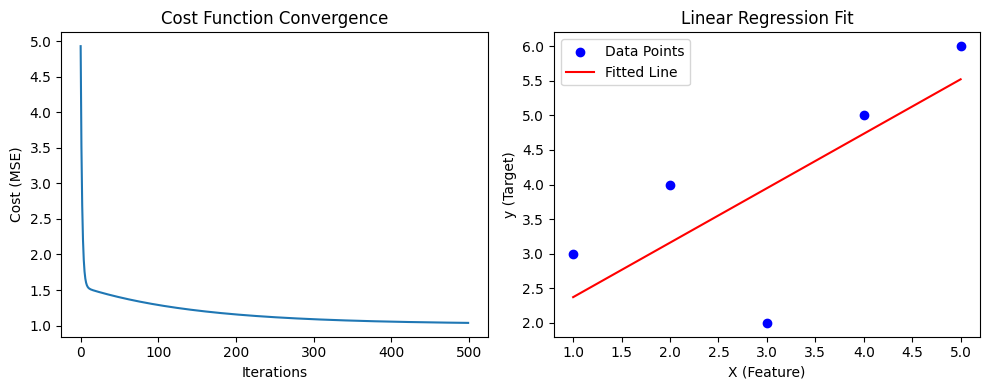

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Define the cost function (Mean Squared Error)
def cost_function(w, b, X, y):
    y_pred = w * X + b
    cost = np.mean((y_pred - y) ** 2)
    return cost

# ✅ Step 2: Define the analytical gradients (make sure return is included)
def gradients(w, b, X, y):
    n = len(X)
    y_pred = w * X + b
    dw = (2/n) * np.sum((y_pred - y) * X)
    db = (2/n) * np.sum(y_pred - y)
    return dw, db   # ← this line must be inside the function block!

# Step 3: Gradient Descent Algorithm
def gradient_descent(X, y, w_init, b_init, learning_rate, iterations):
    w = w_init
    b = b_init
    cost_history = []

    for i in range(iterations):
        dw, db = gradients(w, b, X, y)   # compute gradient

        # Update parameters
        w -= learning_rate * dw
        b -= learning_rate * db

        # Save cost for plotting
        cost = cost_function(w, b, X, y)
        cost_history.append(cost)

        # Print progress every 50 iterations
        if i % 50 == 0:
            print(f"Iteration {i}: Cost={cost:.4f}, w={w:.4f}, b={b:.4f}")

    return w, b, cost_history

# Step 4: Test data
X = np.array([1, 2, 3, 4, 5])
y = np.array([3, 4, 2, 5, 6])

# Step 5: Parameters
w_init = 0.5
b_init = 0.0
learning_rate = 0.01
iterations = 500

# Step 6: Run Gradient Descent
w_final, b_final, cost_history = gradient_descent(X, y, w_init, b_init, learning_rate, iterations)

print("\nFinal Parameters:")
print(f"w = {w_final:.4f}, b = {b_final:.4f}")
print(f"Final Cost = {cost_history[-1]:.4f}")

# Step 7: Visualization
plt.figure(figsize=(10,4))

# Cost function convergence
plt.subplot(1, 2, 1)
plt.plot(cost_history)
plt.title("Cost Function Convergence")
plt.xlabel("Iterations")
plt.ylabel("Cost (MSE)")

# Regression line fit
plt.subplot(1, 2, 2)
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X, w_final * X + b_final, color='red', label='Fitted Line')
plt.title("Linear Regression Fit")
plt.xlabel("X (Feature)")
plt.ylabel("y (Target)")
plt.legend()

plt.tight_layout()
plt.show()
